In [1]:
#Importing libararies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Clustering
from sklearn.preprocessing import MinMaxScaler


Matplotlib is building the font cache; this may take a moment.


In [2]:
# loading the dataset....

iris_df = pd.read_csv('Iris.csv')

In [3]:
# displaying a sample data

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
# basic descriptive stats...

iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [79]:
# check for the datatypes and other meta data

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [80]:
# check for any missing values

iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [81]:
# data check and unique values exploration

for i in iris_df.columns:
    print('Unique Values of ', i, 'are :', iris_df[i].nunique())

Unique Values of  Id are : 150
Unique Values of  SepalLengthCm are : 35
Unique Values of  SepalWidthCm are : 23
Unique Values of  PetalLengthCm are : 43
Unique Values of  PetalWidthCm are : 22
Unique Values of  Species are : 3


In [6]:
# 

iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# frequency count 

iris_df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
# Renaming data labels for clearity

iris_df['Species'] = iris_df['Species'].map({'Iris-setosa':'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'})

In [9]:
#

iris_df['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [10]:
iris_df.rename(columns = {'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace = True)

In [11]:
iris_df.columns

Index(['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'],
      dtype='object')

In [12]:
iris_df.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


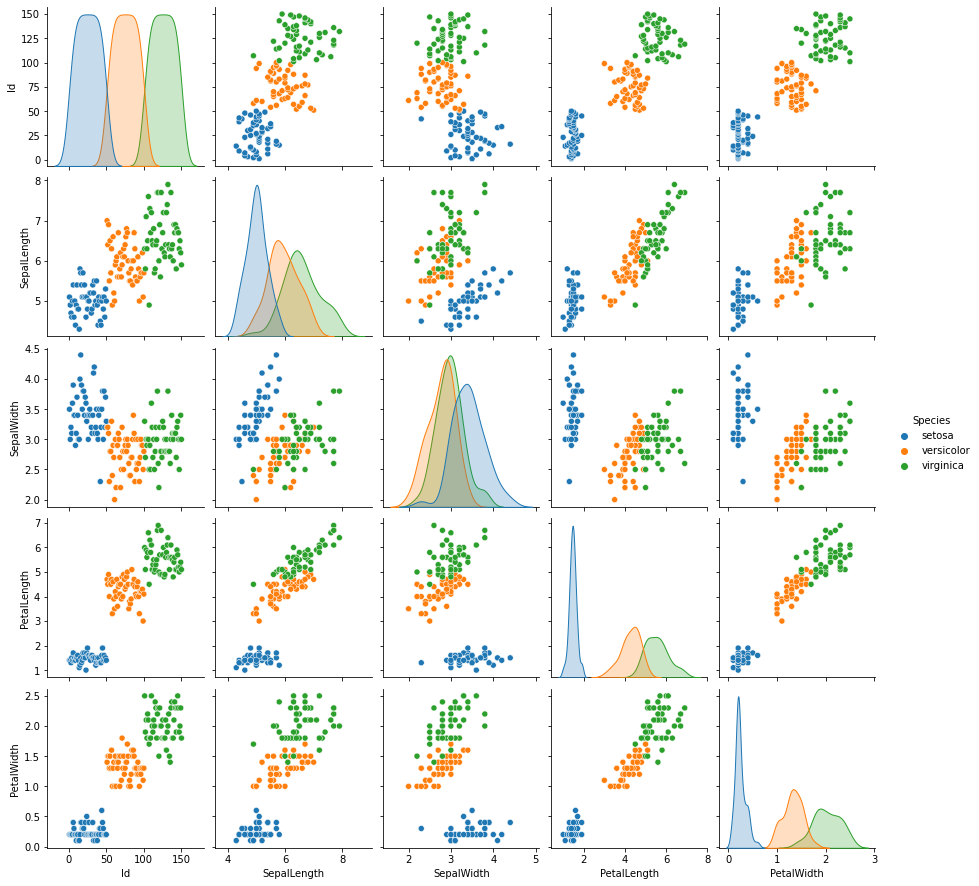

In [13]:
sns.pairplot(iris_df, hue = 'Species')

In [14]:
species_count = iris_df.groupby(['Species']).agg({'Id': 'count'}).rename(columns = {'Id': 'Count'}).reset_index()

<AxesSubplot:xlabel='Species', ylabel='Count'>

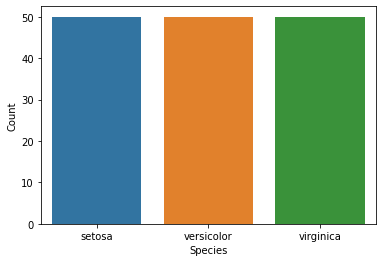

In [15]:
# a balanced dataset

sns.barplot(x = 'Species', y = 'Count', data = species_count)

In [92]:
iris_df.columns

Index(['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'],
      dtype='object')

In [93]:
# data scaling....

scaler = MinMaxScaler()

iris_df['S_SepalLength'] = scaler.fit(np.array(iris_df['SepalLength']).reshape(-1,1))
iris_df['S_SepalLength'] = scaler.transform(np.array(iris_df['SepalLength']).reshape(-1,1))

iris_df['S_SepalWidth'] = scaler.fit(np.array(iris_df['SepalWidth']).reshape(-1,1))
iris_df['S_SepalWidth'] = scaler.transform(np.array(iris_df['SepalWidth']).reshape(-1,1))

iris_df['S_PetalLength'] = scaler.fit(np.array(iris_df['PetalLength']).reshape(-1,1))
iris_df['S_PetalLength'] = scaler.transform(np.array(iris_df['PetalLength']).reshape(-1,1))

iris_df['S_PetalWidth'] = scaler.fit(np.array(iris_df['PetalWidth']).reshape(-1,1))
iris_df['S_PetalWidth'] = scaler.transform(np.array(iris_df['PetalWidth']).reshape(-1,1))



In [94]:
data_df = iris_df[['S_SepalLength','S_SepalWidth','S_PetalLength','S_PetalWidth']]

In [95]:
data_df.columns

Index(['S_SepalLength', 'S_SepalWidth', 'S_PetalLength', 'S_PetalWidth'], dtype='object')

In [96]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data_df[['S_SepalLength', 'S_SepalWidth', 'S_PetalLength', 'S_PetalWidth']])
    sse.append(km.inertia_)

<AxesSubplot:>

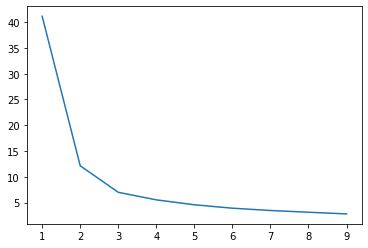

In [97]:
# elbow curve to determine optimum number of clusters..

sns.lineplot(x = range(1,10), y = sse)

In [5]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(data_df) 

NameError: name 'data_df' is not defined

In [4]:
data_df['Pred'] = y_pred

NameError: name 'y_pred' is not defined

In [100]:
data_df.head()

,S_SepalLength,S_SepalWidth,S_PetalLength,S_PetalWidth,Pred
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


<AxesSubplot:xlabel='S_SepalLength', ylabel='S_SepalWidth'>

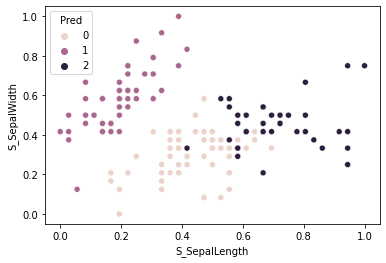

In [101]:
# Predicted Results

sns.scatterplot(x = 'S_SepalLength', y = 'S_SepalWidth',hue = 'Pred', data = data_df)

<AxesSubplot:xlabel='S_PetalLength', ylabel='S_PetalWidth'>

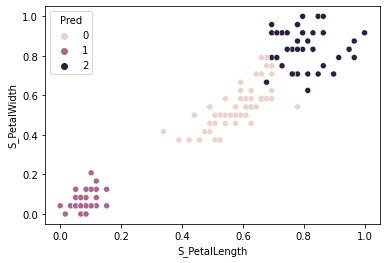

In [102]:
# Predicted Results

sns.scatterplot(x = 'S_PetalLength', y = 'S_PetalWidth',hue = 'Pred', data = data_df)

<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>

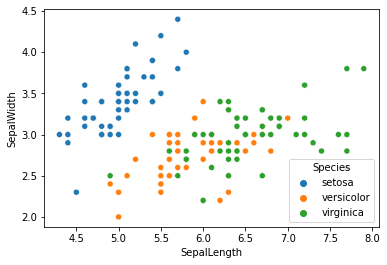

In [103]:
# Actual Results

sns.scatterplot(x = 'SepalLength', y = 'SepalWidth', hue = 'Species', data = iris_df)

<AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>

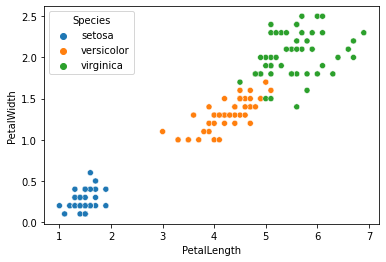

In [104]:
# Actual Results

sns.scatterplot(x = 'PetalLength', y = 'PetalWidth', hue = 'Species', data = iris_df)